In [1]:
import os

In [2]:
import glob

In [13]:
%matplotlib inline
import matplotlib.pylab as plt
import pandas as pd
import gdal
import numpy as np
import time , os , glob
from osgeo import gdal

In [14]:
os.chdir(r'D:\openEarthSAR\testdata\testdata\S32631X402380Y1491460sS1_A_vh_mtfil')

In [15]:
glob.glob("*.tif")

['S32631X402380Y1491460sS1_A_vh_20150403_0001_A_mtfil_amp.tif',
 'S32631X402380Y1491460sS1_A_vh_20151117_0001_A_mtfil_amp.tif',
 'S32631X402380Y1491460sS1_A_vh_20151129_0001_A_mtfil_amp.tif',
 'S32631X402380Y1491460sS1_A_vh_20151211_0001_A_mtfil_amp.tif',
 'S32631X402380Y1491460sS1_A_vh_20151223_0001_A_mtfil_amp.tif',
 'S32631X402380Y1491460sS1_A_vh_20160104_0001_A_mtfil_amp.tif',
 'S32631X402380Y1491460sS1_A_vh_20160128_0001_A_mtfil_amp.tif',
 'S32631X402380Y1491460sS1_A_vh_20160209_0001_A_mtfil_amp.tif',
 'S32631X402380Y1491460sS1_A_vh_20160304_0001_A_mtfil_amp.tif',
 'S32631X402380Y1491460sS1_A_vh_20160316_0001_A_mtfil_amp.tif',
 'S32631X402380Y1491460sS1_A_vh_20160328_0001_A_mtfil_amp.tif',
 'S32631X402380Y1491460sS1_A_vh_20160409_0001_A_mtfil_amp.tif',
 'S32631X402380Y1491460sS1_A_vh_20160421_0001_A_mtfil_amp.tif',
 'S32631X402380Y1491460sS1_A_vh_20160503_0001_A_mtfil_amp.tif',
 'S32631X402380Y1491460sS1_A_vh_20160515_0001_A_mtfil_amp.tif',
 'S32631X402380Y1491460sS1_A_vh_20160527

In [13]:
os.chdir(r'D:\openEarthSAR\testdata\testdata')

In [15]:
glob.glob("*.vrt")

['S32631X402380Y1491460sS1_A_vh_mtfil.vrt']

In [16]:
image= 'D:\Personal Data\Satellite Data\SAR data\SAR data\S1A_IW_GRDH_1SDV_20190706T233106_20190706T233131_028003_03298D_83D4.SAFE\measurement\s1a-iw-grd-vh-20190706t233106-20190706t233131-028003-03298d-002.tiff'

In [17]:
img = gdal.Open(image)

In [6]:
type(img)

osgeo.gdal.Dataset

In [7]:
print(img.RasterCount)
print(img.RasterXSize)
print(img.RasterYSize)
print(img.GetRasterBand(1).GetStatistics(0, 1))


1
25591
16743
[0.0, 9266.0, 113.23163330648, 46.639138357569]


In [8]:
count = img.RasterCount
response = {}
for counter in range(1, count+1):
    stats = img.GetRasterBand(counter).GetStatistics(0, 1)
    response["band_{}".format(counter)] = "Minimum=%.3f, Maximum=%.3f, Mean=%.3f, StdDev=%.3f" % (stats[0], stats[1], stats[2], stats[3])
print(response)

{'band_1': 'Minimum=0.000, Maximum=9266.000, Mean=113.232, StdDev=46.639'}


In [9]:
band = img.GetRasterBand(1)

In [10]:
raster = band.ReadAsArray()

In [11]:
type(band)

osgeo.gdal.Band

In [14]:
raster_sub = band.ReadAsArray(1000,1000,1000,1000)
raster_sub

array([[169, 159, 101, ..., 179, 128, 172],
       [115, 138, 112, ..., 160, 184, 202],
       [ 88,  93,  95, ..., 133, 200, 227],
       ...,
       [ 88, 124, 130, ...,  67,  87,  96],
       [108, 118, 108, ...,  97,  90, 100],
       [125, 102,  87, ..., 108,  75,  89]], dtype=uint16)

Text(0.5, 1.0, 'Histogram Band')

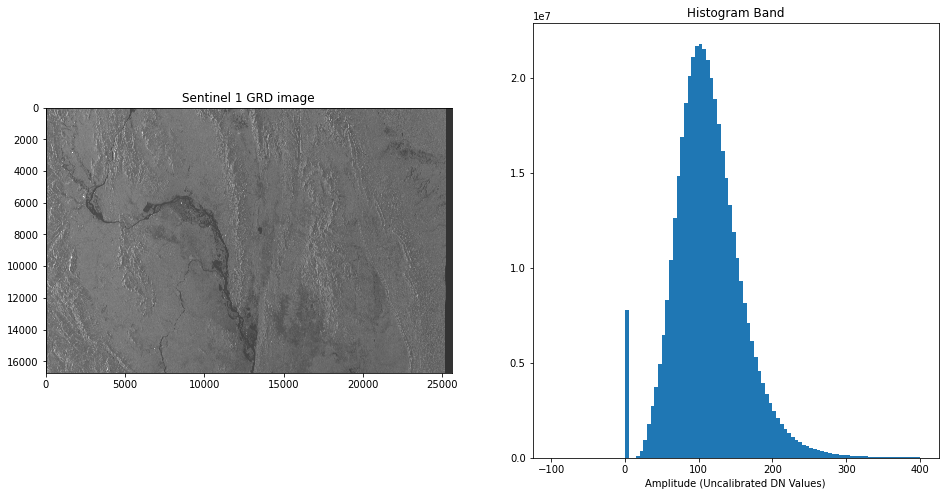

In [27]:
fig = plt.figure(figsize=(16,8)) # Initialize figure with a size
ax1 = fig.add_subplot(121) # 121 determines: 1 row, 2 plots, first plot
ax2 = fig.add_subplot(122) # 122 determines: 1 row, 2 plots, second plot
# First plot: Image
ax1.imshow(raster,cmap='gray',vmin=-100,vmax=400)
ax1.set_title('Sentinel 1 GRD image')
# Second plot: Historgram
# IMPORTANT: To get a histogram, we first need to *flatten*
# the two-dimensional image into a one-dimensional vector.
h = ax2.hist(raster.flatten(),bins=100,range=(-100,400))
ax2.xaxis.set_label_text('Amplitude (Uncalibrated DN Values)')
ax2.set_title('Histogram Band' )

In [44]:
def showImage(raster,vmin=None,vmax=None):
    fig = plt.figure(figsize=(20,10))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    ax1.imshow(raster,cmap='gray',vmin=vmin,vmax=vmax)
    ax1.set_title('Sentinel 1 GRD image')
    
    vmin=np.percentile(raster,2) if vmin==None else vmin #change vmin & vmax to change what values are displayed
    vmax=np.percentile(raster,98) if vmax==None else vmax
    ax1.xaxis.set_label_text('Linear stretch Min={} Max={}'.format(vmin,vmax))
    
    h = ax2.hist(raster.flatten(),bins=100,range=(vmin,vmax))
    ax2.xaxis.set_label_text('Amplitude (Uncalibrated DN Values)')
    ax2.set_title('Histogram Band')

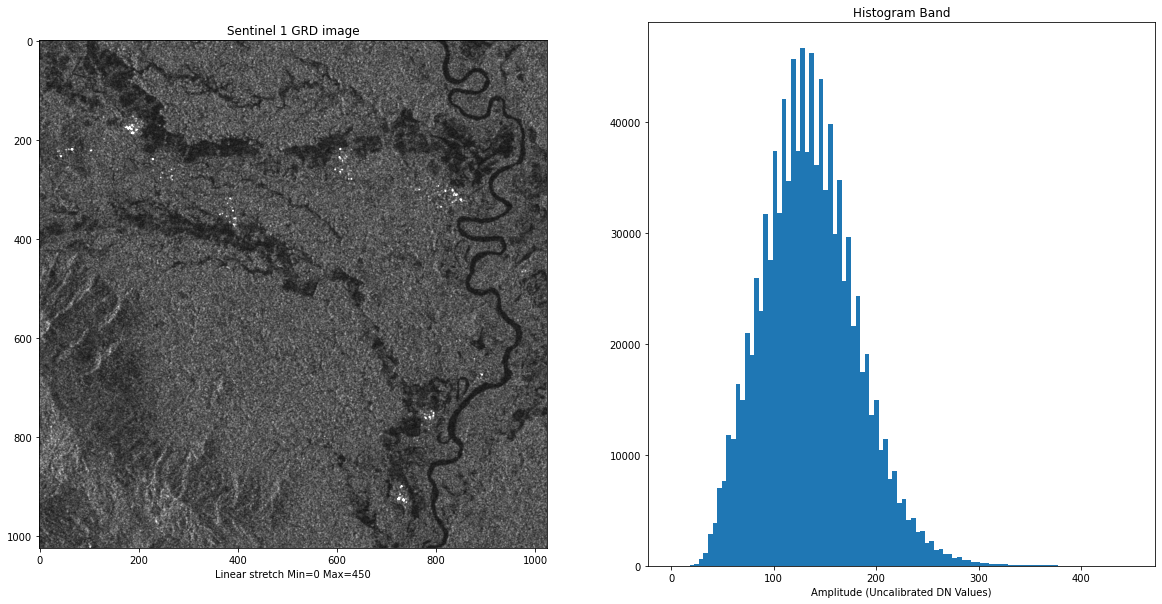

In [134]:
showImage(rasterDN,0,450 )
plt.savefig('rasterDN.jpg')

In [133]:
os.getcwd()

'D:\\Personal Data\\Satellite Data\\SAR data'

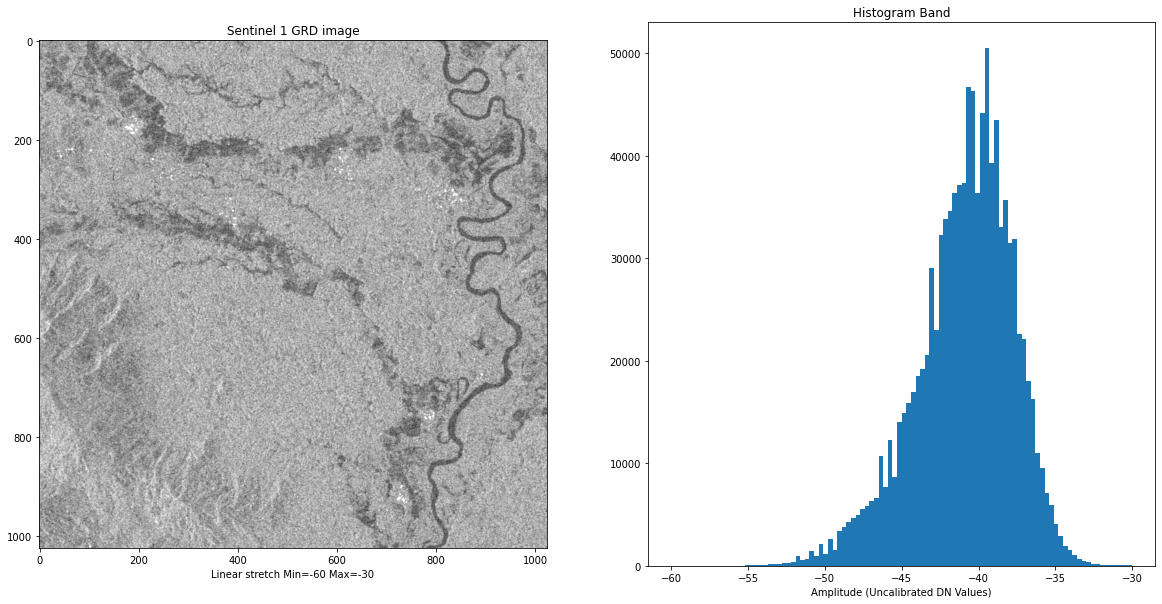

In [135]:
showImage(rasterdB,-60,-30 )
plt.savefig('rasterdB.jpg')

In [57]:
rasterdB= 20*np.log10(rasterDN)-83

In [98]:
rasterPwr= np.power(10. , rasterdB/10.)

In [108]:
np.amin(rasterPwr)

8.47006e-07

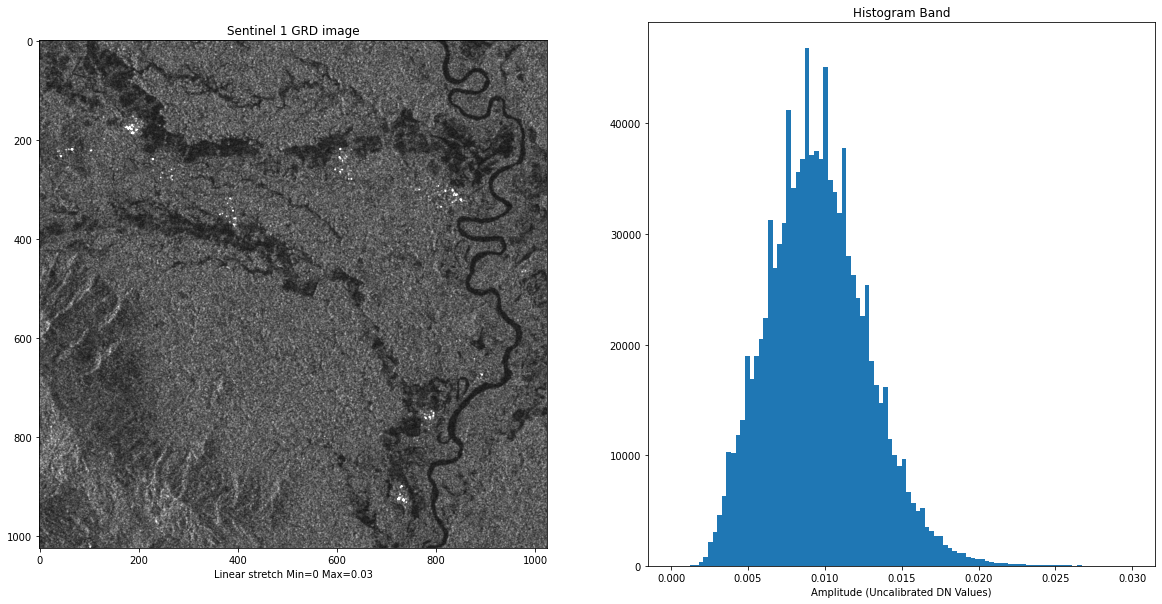

In [137]:
showImage(rasterAmp , 0 ,0.03)
plt.savefig('rasterAmp.jpg')

In [78]:
rasterAmp= np.sqrt(rasterPwr)

Text(0.5, 1.0, 'dB Scaled')

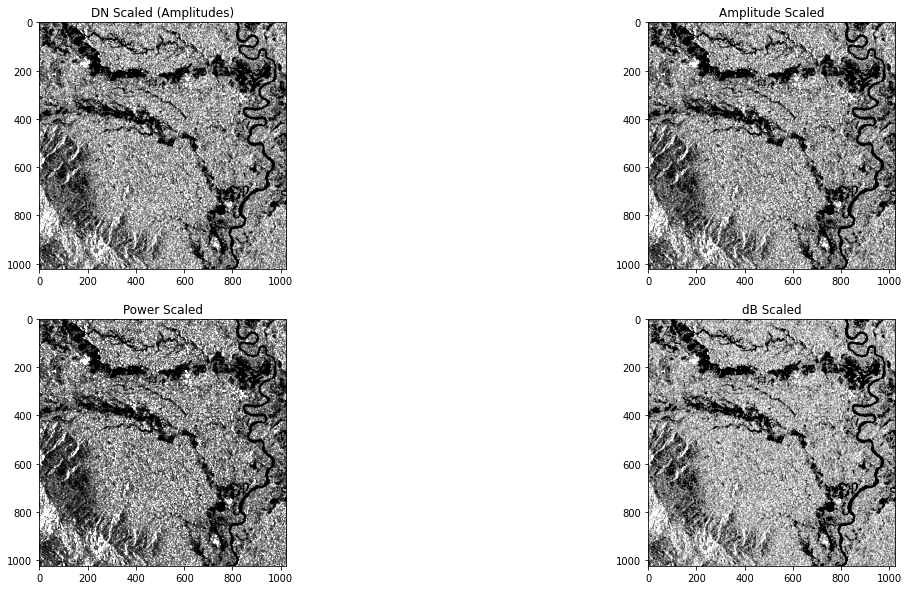

In [129]:
fig = plt.figure(figsize=(20,10)) # Initialize figure with a size
ax1 = fig.add_subplot(221) # 121 determines: 1 row, 2 plots, first plot
ax2 = fig.add_subplot(222) # 122 determines: 1 row, 2 plots, second plot
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)


ax1.imshow(rasterDN,cmap='gray',
vmin=np.percentile(rasterDN,10),
vmax=np.percentile(rasterDN,90))
ax2.imshow(rasterAmp,cmap='gray',
vmin=np.percentile(rasterAmp,10),
vmax=np.percentile(rasterAmp,90))
ax3.imshow(rasterPwr,cmap='gray',
vmin=np.percentile(rasterPwr,10),
vmax=np.percentile(rasterPwr,90))
ax4.imshow(rasterdB,cmap='gray',
vmin=np.percentile(rasterdB,10),
vmax=np.percentile(rasterdB,90))
ax1.set_title('DN Scaled (Amplitudes)')
ax2.set_title('Amplitude Scaled')
ax3.set_title('Power Scaled')
ax4.set_title('dB Scaled')

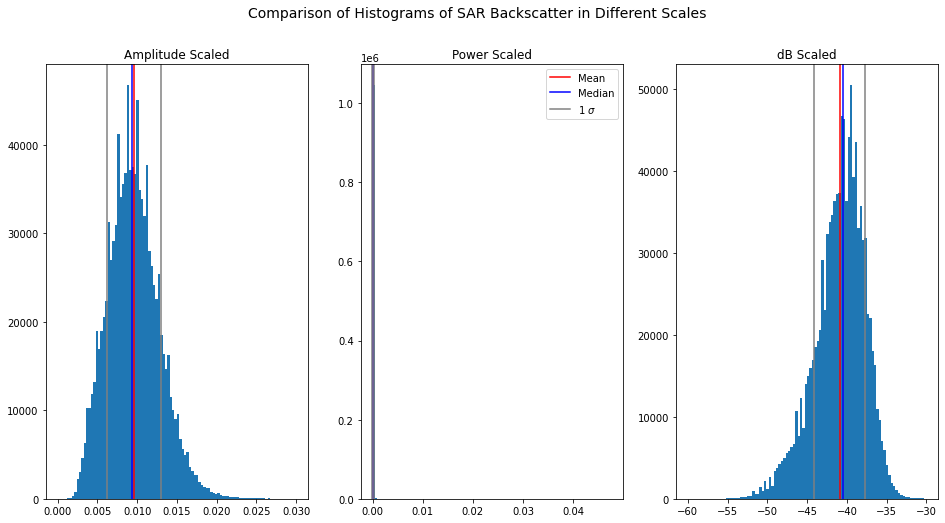

In [139]:
fig=plt.figure(figsize=(16,8))
fig.suptitle('Comparison of Histograms of SAR Backscatter in Different Scales',fontsize=14)
ax1=fig.add_subplot(131)
ax2=fig.add_subplot(132)
ax3=fig.add_subplot(133)
# Important to "flatten" the 2D raster image to produce a historgram

ax1.hist(rasterAmp.flatten(),bins=100,range=(0.,0.03))
ax2.hist(rasterPwr.flatten(),bins=100,range=(8.47006e-07,0.047606442))
ax3 .hist(rasterdB.flatten(),bins=100,range=(-60,-30))
# Means, medians and stddev

amp_mean=rasterAmp.mean()
amp_std=rasterAmp.std()
pwr_mean=rasterPwr.mean()
pwr_std=rasterPwr.std()
dB_mean=rasterdB.mean()
dB_std=rasterdB.std()

# Some lines for mean and median
ax1.axvline(amp_mean,color='red')
ax1.axvline(np.median(rasterAmp),color='blue')
ax2.axvline(pwr_mean,color='red',label='Mean')
ax2.axvline(np.median(rasterPwr),color='blue',label='Median')
ax3.axvline(dB_mean,color='red')
ax3.axvline(np.median(rasterdB),color='blue')

# Lines for 1 stddev
ax1.axvline(amp_mean-amp_std,color='gray')
ax1.axvline(amp_mean+amp_std,color='gray')
ax2.axvline(pwr_mean-pwr_std,color='gray',label='1 $\sigma$')
ax2.axvline(pwr_mean+pwr_std,color='gray')
ax3.axvline(dB_mean-dB_std,color='gray')
ax3.axvline(dB_mean+dB_std,color='gray')
ax1.set_title('Amplitude Scaled')
ax2.set_title('Power Scaled')
ax3.set_title('dB Scaled')
ax2.legend()

plt.savefig('Comparison.jpg')

In [120]:
rasterdB[ 1:2, 4:5].mean()

-41.93843

In [16]:
%matplotlib inline
import matplotlib.pylab as plt
import pandas as pd
import gdal
import numpy as np
import time , os , glob
from osgeo import gdal

In [17]:
os.getcwd()

'D:\\openEarthSAR\\testdata\\testdata'

In [20]:
glob.glob("*.dates")

['S32631X402380Y1491460sS1_A_vh_mtfil.dates']

In [21]:
datefile='S32631X402380Y1491460sS1_A_vh_mtfil.dates'
imagefile='S32631X402380Y1491460sS1_A_vh_mtfil.vrt'

In [25]:
dates = open(datefile).readlines()
tindex =pd.DatetimeIndex(dates)

In [32]:
j= 1
print('bands and dates for ',imagefile)
for i in tindex:
    print("{:4d} {}".format(j, i.date()), end=' ')
    j+=1
    if j%5 == 1:
        print()
    

bands and dates for  S32631X402380Y1491460sS1_A_vh_mtfil.vrt
   1 2015-04-03    2 2015-11-17    3 2015-11-29    4 2015-12-11    5 2015-12-23 
   6 2016-01-04    7 2016-01-28    8 2016-02-09    9 2016-03-04   10 2016-03-16 
  11 2016-03-28   12 2016-04-09   13 2016-04-21   14 2016-05-03   15 2016-05-15 
  16 2016-05-27   17 2016-06-08   18 2016-07-02   19 2016-07-14   20 2016-07-26 
  21 2016-08-07   22 2016-08-19   23 2016-08-31   24 2016-09-12   25 2016-09-24 
  26 2016-10-06   27 2016-10-18   28 2016-10-30   29 2016-11-11   30 2016-11-23 
  31 2016-12-05   32 2016-12-17   33 2016-12-29   34 2017-01-10   35 2017-01-22 
  36 2017-02-03   37 2017-02-15   38 2017-02-27   39 2017-03-11   40 2017-03-23 
  41 2017-04-04   42 2017-04-16   43 2017-04-28   44 2017-05-10   45 2017-05-22 
  46 2017-06-03   47 2017-06-15   48 2017-06-27   49 2017-07-09   50 2017-07-21 
  51 2017-08-02   52 2017-08-14   53 2017-08-26   54 2017-09-07   55 2017-09-19 
  56 2017-10-13   57 2017-10-25   58 2017-11-06 

In [33]:
img= gdal.Open(imagefile)

In [55]:
print(img.RasterCount)
print(img.RasterXSize)
print(img.RasterYSize)
print(img.GetRasterBand)

60
44
38
<bound method Dataset.GetRasterBand of <osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x0000016778878F30> >>


In [47]:
band= img.GetRasterBand(1)

In [48]:
raster =band.ReadAsArray()

In [49]:
raster_sub = band.ReadAsArray(5,20,5,5)

In [50]:
raster_sub

array([[4224, 3970, 3693, 3345, 2990],
       [4200, 3689, 3500, 3377, 3063],
       [3851, 3276, 3039, 3077, 2987],
       [3581, 3099, 2669, 2527, 2648],
       [3148, 2935, 2567, 2218, 2200]], dtype=uint16)

In [52]:
raster_1 = img.GetRasterBand(5).ReadAsArray()
raster_2= img.GetRasterBand(18).ReadAsArray()

Text(0.5, 1.0, 'Histogram Band 5 2015-12-23')

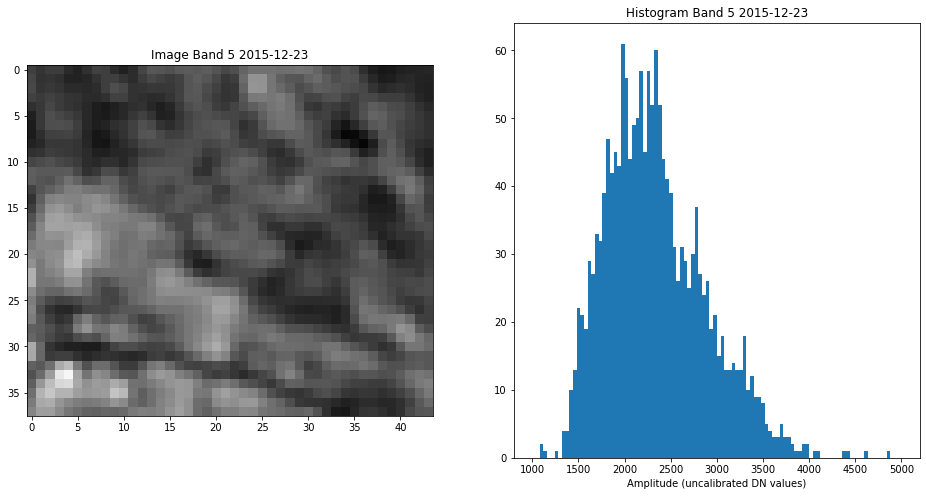

In [65]:
fig= plt.figure(figsize=(16,8))
ax1= fig.add_subplot(121)
ax2= fig.add_subplot(122)

bandnbr=5
ax1.imshow(raster_1, cmap='gray',vmin=1000, vmax=5000)
ax1.set_title('Image Band {} {}'.format(bandnbr,tindex[bandnbr-1].date()))

h = ax2.hist(raster_1.flatten(),bins=100,range=(1000,5000))
ax2.xaxis.set_label_text('Amplitude (uncalibrated DN values)')
ax2.set_title('Histogram Band {} {}'.format(bandnbr,tindex[bandnbr-1].date()))

In [67]:
def showImage(raster,tindex,bandnbr,vmin=None,vmax=None):
    fig = plt.figure(figsize=(16,8))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)

    ax1.imshow(raster,cmap='gray',vmin=vmin,vmax=vmax)
    ax1.set_title('Image Band {} {}'.format(bandnbr,tindex[bandnbr-1].date()))

    vmin=np.percentile(raster,2) if vmin==None else vmin #change vmin & vmax to change what values are displayed
    vmax=np.percentile(raster,98) if vmax==None else vmax

    ax1.xaxis.set_label_text('Linear stretch Min={} Max={}'.format(vmin,vmax))
    h = ax2.hist(raster.flatten(),bins=100,range=(0,8000))
    ax2.xaxis.set_label_text('Amplitude (Uncalibrated DN Values)')
    ax2.set_title('Histogram Band {} {}'.format(bandnbr,tindex[bandnbr-1].date()))

In [94]:
rasterDN= img.ReadAsArray()

In [98]:
rasterDN.shape

(60, 38, 44)

In [99]:
rasterdB= 20*np.log10(rasterDN)-83

In [100]:
rasterPwr= np.power(10.,rasterdB/10.)

In [101]:
rasterAmp=np.sqrt(rasterPwr)

In [102]:
bandnbr=20
tindex[bandnbr-1]

Timestamp('2016-07-26 00:00:00')

Text(0.5, 1.0, 'dB Scaled')

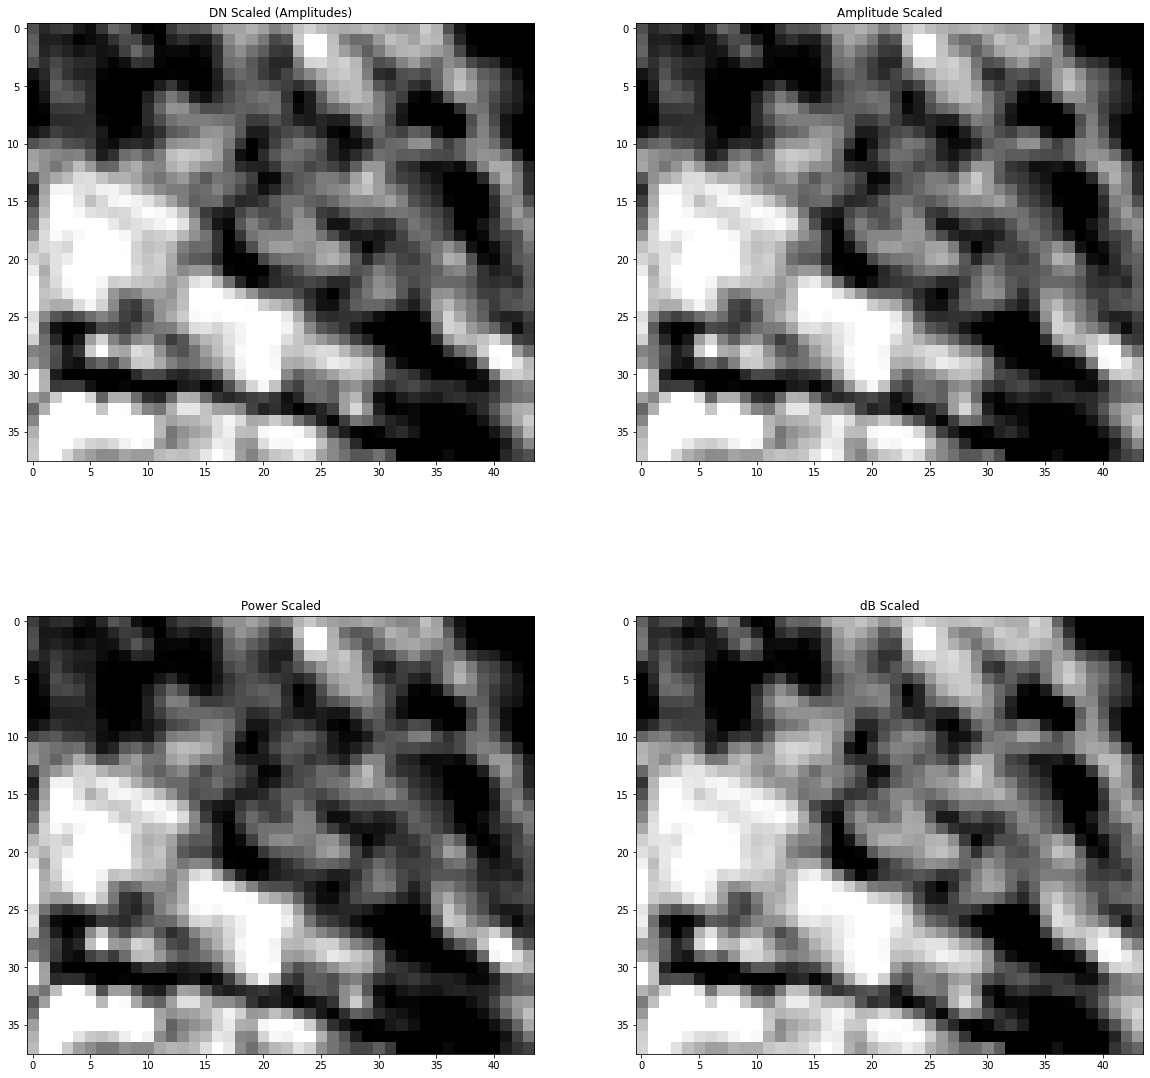

In [108]:
fig=plt.figure(figsize=(20,20))
ax1=fig.add_subplot(221)
ax2=fig.add_subplot(222)
ax3=fig.add_subplot(223)
ax4=fig.add_subplot(224)

ax1.imshow(rasterDN[bandnbr], cmap='gray',vmin=np.percentile(rasterDN,10),vmax=np.percentile(rasterDN,90))
ax2.imshow(rasterAmp[bandnbr],cmap='gray',vmin=np.percentile(rasterAmp,10),vmax=np.percentile(rasterAmp,90))
ax3.imshow(rasterPwr[bandnbr],cmap='gray',vmin=np.percentile(rasterPwr,10),vmax=np.percentile(rasterPwr,90))
ax4.imshow(rasterdB[bandnbr],cmap='gray',vmin=np.percentile(rasterdB,10),vmax=np.percentile(rasterdB,90))

ax1.set_title('DN Scaled (Amplitudes)')
ax2.set_title('Amplitude Scaled')
ax3.set_title('Power Scaled')
ax4.set_title('dB Scaled')

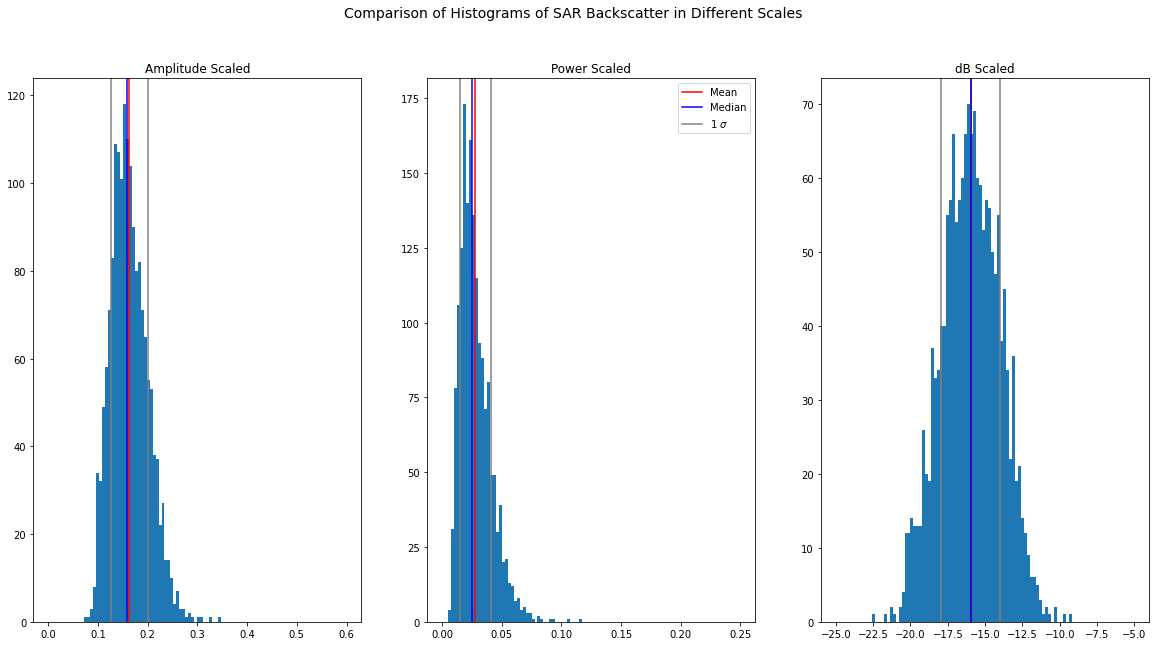

In [107]:
fig=plt.figure(figsize=(20,10))

fig.suptitle('Comparison of Histograms of SAR Backscatter in Different Scales',fontsize=14)
ax1=fig.add_subplot(131)
ax2=fig.add_subplot(132)
ax3=fig.add_subplot(133)

# Important to "flatten" the 2D raster image to produce a historgram
ax1.hist(rasterAmp[bandnbr].flatten(),bins=100,range=(0.,0.6))
ax2.hist(rasterPwr[bandnbr].flatten(),bins=100,range=(0.,0.25))
ax3.hist(rasterdB[bandnbr].flatten(),bins=100,range=(-25,-5))

# Means, medians and stddev
amp_mean=rasterAmp[bandnbr].mean()
amp_std=rasterAmp[bandnbr].std()
pwr_mean=rasterPwr[bandnbr].mean()
pwr_std=rasterPwr[bandnbr].std()
dB_mean=rasterdB[bandnbr].mean()
dB_std=rasterdB[bandnbr].std()

# Some lines for mean and median
ax1.axvline(amp_mean,color='red')
ax1.axvline(np.median(rasterAmp[bandnbr]),color='blue')
ax2.axvline(pwr_mean,color='red',label='Mean')
ax2.axvline(np.median(rasterPwr[bandnbr]),color='blue',label='Median')
ax3.axvline(dB_mean,color='red')
ax3.axvline(np.median(rasterdB[bandnbr]),color='blue')

# Lines for 1 stddev
ax1.axvline(amp_mean-amp_std,color='gray')
ax1.axvline(amp_mean+amp_std,color='gray')
ax2.axvline(pwr_mean-pwr_std,color='gray',label='1 $\sigma$')
ax2.axvline(pwr_mean+pwr_std,color='gray')
ax3.axvline(dB_mean-dB_std,color='gray')
ax3.axvline(dB_mean+dB_std,color='gray')

ax1.set_title('Amplitude Scaled')
ax2.set_title('Power Scaled')
ax3.set_title('dB Scaled')
ax2.legend()

In [112]:
g1_dB = -17.5
g2_dB = -13.5
g1_pwr = np.power(10.,-10/10.)
g2_pwr = np.power(10.,-15/10.)
mean_dB = (g1_dB+g2_dB)/2.
mean_pwr = (g1_pwr+g2_pwr)/2.
mean_pwr_inDB = 10.*np.log10(mean_pwr)
print('Mean averaging dB values      :{}'.format(mean_dB))
print('Mean averaging power values in dB     :{}'.format(mean_pwr_inDB))

Mean averaging dB values      :-15.5
Mean averaging power values in dB     :-11.816989475978865


In [117]:
img_like= gdal.Open(imagefile)
bandnbr_like= 20

r1=img_like.GetRasterBand(bandnbr_like).ReadAsArray()

r1_dB=20*np.log10(r1)-83
print(r1_dB)

[[-15.421143 -16.18319  -15.578644 ... -21.082672 -20.7546   -20.386894]
 [-15.356056 -16.764923 -16.597076 ... -21.013298 -21.322784 -21.131565]
 [-15.516037 -16.9794   -16.580467 ... -20.49688  -21.38026  -21.351475]
 ...
 [-15.552811 -12.634987 -12.143494 ... -16.747993 -15.255768 -14.041344]
 [-15.323692 -13.274223 -13.214897 ... -17.470764 -15.971809 -14.899902]
 [-15.181297 -14.044441 -14.150406 ... -16.850082 -16.18319  -15.929367]]


Text(0.5, 1.0, 'Histogram Band 5 2015-12-23')

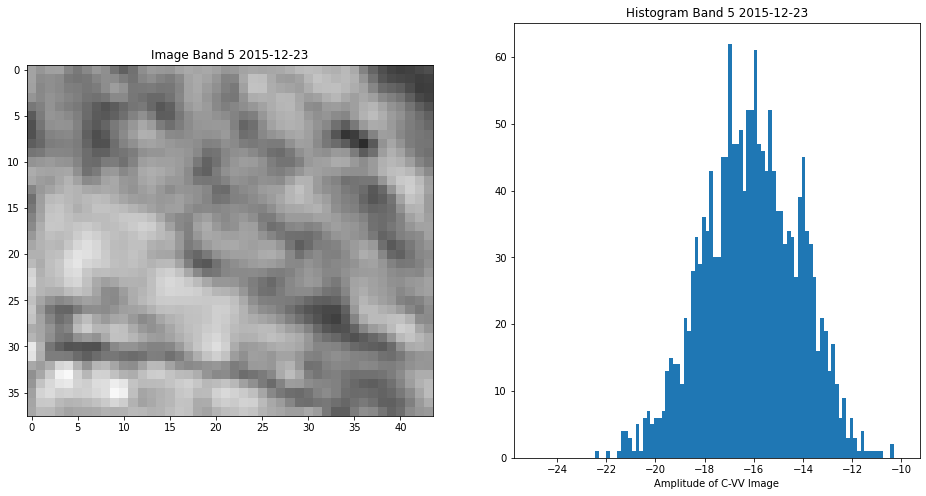

In [133]:
fig= plt.figure(figsize=(16,8))
ax1= fig.add_subplot(121)
ax2= fig.add_subplot(122)

bandnbr=5
ax1.imshow(r1_dB, cmap='gray',vmin=-25, vmax=-10)
ax1.set_title('Image Band {} {}'.format(bandnbr,tindex[bandnbr-1].date()))

h = ax2.hist(r1_dB.flatten(),bins=100,range=(-25,-10))
ax2.xaxis.set_label_text('Amplitude of C-VV Image')
ax2.set_title('Histogram Band {} {}'.format(bandnbr,tindex[bandnbr-1].date()))

In [135]:
%matplotlib inline

In [136]:
import os
import time
import gdal
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches # Needed to draw rectangles
from matplotlib import animation, rc
from IPython.display import HTML

In [138]:
tindex

DatetimeIndex(['2015-04-03', '2015-11-17', '2015-11-29', '2015-12-11',
               '2015-12-23', '2016-01-04', '2016-01-28', '2016-02-09',
               '2016-03-04', '2016-03-16', '2016-03-28', '2016-04-09',
               '2016-04-21', '2016-05-03', '2016-05-15', '2016-05-27',
               '2016-06-08', '2016-07-02', '2016-07-14', '2016-07-26',
               '2016-08-07', '2016-08-19', '2016-08-31', '2016-09-12',
               '2016-09-24', '2016-10-06', '2016-10-18', '2016-10-30',
               '2016-11-11', '2016-11-23', '2016-12-05', '2016-12-17',
               '2016-12-29', '2017-01-10', '2017-01-22', '2017-02-03',
               '2017-02-15', '2017-02-27', '2017-03-11', '2017-03-23',
               '2017-04-04', '2017-04-16', '2017-04-28', '2017-05-10',
               '2017-05-22', '2017-06-03', '2017-06-15', '2017-06-27',
               '2017-07-09', '2017-07-21', '2017-08-02', '2017-08-14',
               '2017-08-26', '2017-09-07', '2017-09-19', '2017-10-13',
      

In [148]:
img = gdal.Open(imagefile)
band = img.GetRasterBand(1)
# Set the subset
if subset==None:
    subset=(0,0,img.RasterXSize,img.RasterYSize)
    print(subset)

(0, 0, 44, 38)


In [149]:
subset

(0, 0, 44, 38)

In [19]:
# Plot one band and subset outline to see which subset we are interested in
raster=band.ReadAsArray()
vmin=np.percentile(raster.flatten(),5)
vmax=np.percentile(raster.flatten(),95)
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)
ax.imshow(raster,cmap='gray',vmin=vmin,vmax=vmax)
# plot the subset as rectangle
ax.add_patch(patches.Rectangle((subset[0],subset[1]),subset[2],subset[3],fill=False,edgecolor='red'))

NameError: name 'band' is not defined

In [155]:

raster0 = band.ReadAsArray(*subset)
bandnbr=0 # Needed for updates
rasterstack=img.ReadAsArray(*subset)

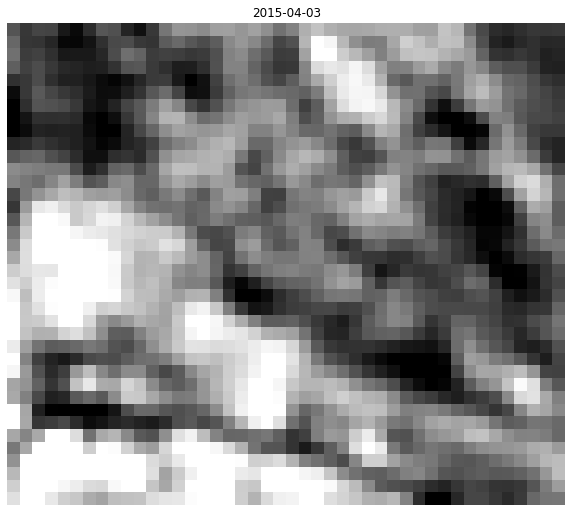

In [157]:
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np
fig=plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.axis('off')
vmin=np.percentile(rasterstack.flatten(),5)
vmax=np.percentile(rasterstack.flatten(),95)
im = ax.imshow(raster0,cmap='gray',vmin=vmin,vmax=vmax)
ax.set_title("{}".format(tindex[0].date()))
def animate(i):
    ax.set_title("{}".format(tindex[i].date()))
    im.set_data(rasterstack[i])
# Interval is given in milliseconds
ani = matplotlib.animation.FuncAnimation(fig, animate,frames=rasterstack.shape[0],
interval=400)

In [160]:
rc('animation',embed_limit=40971520.0) 

In [175]:
from IPython.display import HTML
HTML(ani.to_jshtml())

In [162]:
caldB=-83
calPwr = np.power(10.,caldB/10.)
rasterstack_pwr = np.power(rasterstack,2.)*calPwr
# 2. Compute Means
rs_means_pwr = np.mean(rasterstack_pwr,axis=(1,2))
# 3. Convert to dB
rs_means_dB = 10*np.log10(rs_means_pwr)

In [163]:
rs_means_pwr.shape

(60,)

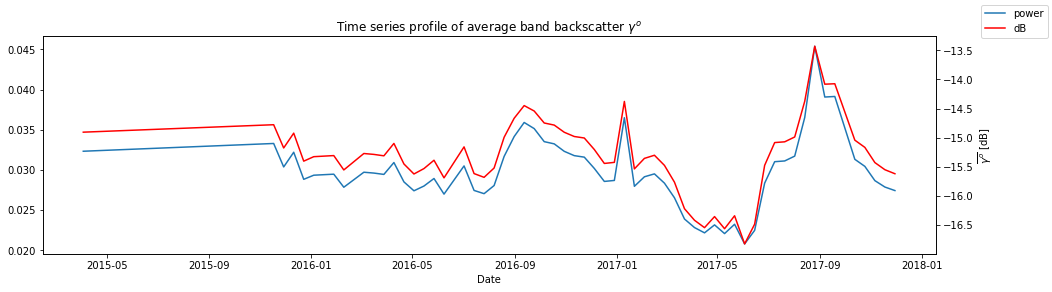

In [177]:
fig=plt.figure(figsize=(16,4))
ax1=fig.add_subplot(111)
ax1.plot(tindex,rs_means_pwr)
ax1.set_xlabel('Date')
ax2.set_ylabel('$\overline{\gamma^o}$[power]')
ax2=ax1.twinx()
ax2.plot(tindex,rs_means_dB,color='red')
ax2.set_ylabel('$\overline{\gamma^o}$ [dB]')
fig.legend(['power','dB'],loc=1)
plt.title('Time series profile of average band backscatter $\gamma^o$ ')
plt.savefig(r"C:\Users\hp\Desktop\timeseries_avg.jpg")

In [171]:
a=pd.Series(rs_means_dB,index=tindex)

In [172]:
a

2015-04-03   -14.906192
2015-11-17   -14.778322
2015-11-29   -15.177412
2015-12-11   -14.923223
2015-12-23   -15.403833
2016-01-04   -15.327148
2016-01-28   -15.308325
2016-02-09   -15.554748
2016-03-04   -15.272565
2016-03-16   -15.288006
2016-03-28   -15.312411
2016-04-09   -15.099496
2016-04-21   -15.452251
2016-05-03   -15.624312
2016-05-15   -15.531395
2016-05-27   -15.388285
2016-06-08   -15.690723
2016-07-02   -15.158982
2016-07-14   -15.617439
2016-07-26   -15.681701
2016-08-07   -15.521640
2016-08-19   -14.993453
2016-08-31   -14.667640
2016-09-12   -14.449704
2016-09-24   -14.542963
2016-10-06   -14.748584
2016-10-18   -14.784633
2016-10-30   -14.907688
2016-11-11   -14.980641
2016-11-23   -15.006299
2016-12-05   -15.203958
2016-12-17   -15.443339
2016-12-29   -15.424818
2017-01-10   -14.378594
2017-01-22   -15.536667
2017-02-03   -15.356397
2017-02-15   -15.302517
2017-02-27   -15.476553
2017-03-11   -15.765147
2017-03-23   -16.220739
2017-04-04   -16.419084
2017-04-16   -16

In [1]:
import os

In [2]:
print("hello wolrd")

hello wolrd


In [5]:
from scipy.ndimage.filters import uniform_filter

In [6]:
from scipy.ndimage.filters import uniform_filter
from scipy.ndimage.measurements import variance

def lee_filter(img, size):
    img_mean = uniform_filter(img, (size, size))
    img_sqr_mean = uniform_filter(img**2, (size, size))
    img_variance = img_sqr_mean - img_mean**2

    overall_variance = variance(img)

    img_weights = img_variance / (img_variance + overall_variance)
    img_output = img_mean + img_weights * (img - img_mean)
    return img_output

In [8]:
from pylab import *

In [ ]:
imshow(lee_filter(raster, 20), vmin=0 , vmax = 1 , cmap='gray')

In [22]:
raster = img.ReadAsArray()